# O Problema OneMax

O problema OneMax é uma tarefa de otimização simples que é frequentemente usada como o Hello World dos frameworks de algoritmos genéticos. A tarefa do OneMax é encontrar a string binária de um determinado comprimento que maximize a soma de seus dígitos. Por exemplo, o problema OneMax de comprimento 5 considerará candidatos como os seguintes:
 * 10010 (soma dos dígitos = 2)
 * 01110 (soma dos dígitos = 3)
 * 11111 (soma dos dígitos = 5)

# Escolhendo o cromossomo

* Como o problema do OneMax lida com strings binárias, a escolha do cromossomo é fácil - cada indivíduo será representado com uma string binária que representa diretamente uma solução candidata. Na implementação real do Python, isso será implementado como uma lista contendo valores inteiros de 0 ou 1. O comprimento do cromossomo corresponde ao tamanho do problema OneMax. Por exemplo, para um problema OneMax de tamanho 5, o indivíduo 10010 será representado pela lista [1, 0, 0, 1, 0].

# Implementação do Algoritmo

In [19]:
# importação de bibliotecas

!pip install deap

from deap import base
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import seaborn as sns

* Próximo passo, é declarar as constantes que irão ser os parametros para o problema e ajudarão a controlar o comportamento do algoritmo genético

In [5]:
# contantes do problema:
comprimento_onemax = 100  # comprimento da cadeia a ser otimizada

# Constantes do Algoritmo Genetico:
tamanho_populacao = 200
p_crossover = 0.9  # probabilidade para crossover
p_mutacao = 0.1   # probabilidade para  mutação de um individuo
max_geracoes = 50

* Um aspecto muito importante do algoritmo genético é o uso de probabilidade, que introz um elemento aleatório (randômico) para o comportamento do algoritmo. A seguir será definido um valor constante a função random. É valido lembrar, que para valores diferentes, o algoritmo também dará resultados diferentes. 

In [7]:
# configurando o random seed:
random_seed = 42
random.seed(random_seed)

* Próximo passo, é utilizar uma função para criar um operador 0 ou 1, que customiza a função random.randomint(a,b), retornando um valor N inteiro que respeita a <= N <= b

In [8]:
# Criando um operador randomico que retorna 0 ou 1:
toolbox = base.Toolbox()
toolbox.register("zeroOuUm", random.randint, 0, 1)


* Agora é preciso criar o que é chamado de classe Fitness. Para alcançar o objetivo do algoritmo, utilizamos a estratégi FItnessMax, usando uma tupla de pesos com um único peso positivo.

In [9]:
# definindo um objetivo unico, maximizando a fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))


* Utilizando a biblioteca DEAP, é convenção utilizar uma classe chamada Individual para representar cada um dos individuos de uma população. A classe é criada com o objetivo de ajudar a ferramente creator. 

In [10]:
# criando a classe Individual na lista
creator.create("Individual", list, fitness=creator.FitnessMax)

* AGora iremos registrar o operador individualCreator, ele tem a função de criar uma instância na classe Individual, preenchido de valores aleatorios de 0 ou 1. Logo depois, criaremos um operador população que irá gerar uma lista de individuos. 

In [13]:
# criando o operador individual operator para preenchimento da classe Individual:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOuUm, comprimento_onemax)

# criando o operador populacao  para gerar uma lista de individuos:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

* Para facilitar o calculo de condicionamento (evaluation na terminologia DEAP), iremos começar definindo uma função autônoma que aceita uma instancia da classe Individual e retorna a condinção referente. 

In [14]:
# calculo de condicionamento:
# calcular o número de 1's no indivíduo
def oneMaxFitness(individual):
    return sum(individual),  # retorna uma tupla

* Por fim, determinamos um operador evaluate como um apeliado para a função oneMaxFitness() que foi definido anteriormente

In [15]:
toolbox.register("evaluate", oneMaxFitness)


* Os operadores genericos são tipicamente criados por função existentes apelidadas de um módulo de ferramentas(tools) e são parametrizados conforme necessário. Aqui, foi escolhido 3 argumentos:
    * seleção de torneio com um tamanho de torneio de 3
    * crossover de ponto único
    * mutação de flip-bit

In [16]:
# Operadores genéticos:

# seleção de torneio com um tamanho de torneio de 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# crossover de ponto único:
toolbox.register("mate", tools.cxOnePoint)

# mutação de flip-bit:
# indpb: Probabilidade independente para cada atributo ser invertido - (Independent probability for each attribute to be flipped)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/comprimento_onemax)

# Solução do algoritmo

* A resolução será aplicada em um função main(). 
 
    1. Primeiro passo é criar um população inicial utilizando o operador populationCreator que foi definido anteriormente. 
    2. Segundo passo é calcular o condicionamento (fitness) para cada individuo da população inicial utilizando a função map() do próprio Python paa aplicar o operador evaluate para cada item da população.
    3. Depois, uma vez que os itens de fitnessValues respectivamente correspondem aos da população (que é uma lista de indivíduos), iremos usar a função zip() para combiná-los e atribuir a tupla de aptidão correspondente a cada indivíduo.
    4. Quarto passo, como temos a objetivo único apto (fitness), extraímos o primeiro valor de cada aptidão para coletar estatísticas.
    5. Logo após, a estatística coletada será o valor máximo de fitness e o valor médio (médio) de fitness para cada geração, duas listas serão utilizadas para o seu propósito.
    6. Finalmente o algoritmo está pronto para o circuito principal do fluxo genético. No topo do loop encontramos as condições de parada.
    7. O contador de geração é atualizado em seguida, e é usado pela condição de parada.
    8. O ponto central do algoritmo genetico são os operadores genéticos, que serão aplicados utilizando a função toolbox.select().
    9. Os individuos selecionados estão alocados em uma lista chamada offspring, e serão clonados para que possamos aplicar os operadores geneticos sem afetar a população original.
    10. Neste passo, será aplicado o operador genetico crossover. Através da programação em Python é possivel aplicar fatias estendidas para emparelhar cada item indexado par da lista de descendentes com o seguinte.
    11. O ultimo operador genetico a ser aplicado é o de mutação. Interando em cada item de toda offspring, o operador ira aplicar a probabilidade configurada de acordo com a probabilidade constante de mutação, p_mutacao. 
    12. Individuos que não foram alterados pelos operadores crossover ou de mutação, e que tiveram seus valor condicionados (fitness), e que foram calculados na geração anterior, não precisam ser calculados novamente. Ao resto dos individuos, terá atribuição de valor vazio.
    13. Os operadores geneticos estão prontos. Já podemos substituir a populção antiga pela nova população.
    14. Os valores de aptidão atuais são coletados para permitir a coleta de estatísticas.
    15. O maximo e media dos valores condicionados (fitness)  são encontrados, e estes valores são adicionados aos acumuladores de estatisticas.
    16. Além disso, localizamos o índice do (primeiro) melhor indivíduo usando o valor máximo de aptidão que acabamos de encontrar e imprimimos esse indivídu.
    17. Para finalizar, são aplicadas funções gráficas para analise. 

- Generation 1: Max Fitness = 65.0, Avg Fitness = 54.195
Best Individual =  0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 

- Generation 2: Max Fitness = 67.0, Avg Fitness = 57.3
Best Individual =  1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 60.51
Best Individual =  0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 

- Generation 4: Max Fitness = 74.0, Avg Fitness = 63.95
Best Individual =  1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 

Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 31: Max Fitness = 99.0, Avg Fitness = 97.57
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 32: Max Fitness = 99.0, Avg Fitness = 97.865
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 33: Max Fitness = 99.0, Avg Fitness = 97.93
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

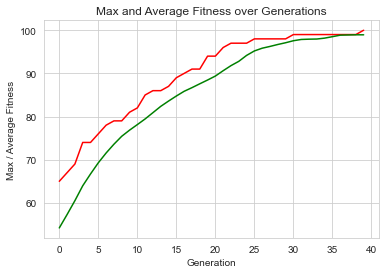

In [20]:
def main():

    # 1. criando população inicial (geração 0):
    populacao = toolbox.populationCreator(n=tamanho_populacao)
    generationCounter = 0

    # 2. e 3. calculando tupla fitnes para cada individuo dentro da população:
    fitnessValues = list(map(toolbox.evaluate, populacao))
    for individual, fitnessValue in zip(populacao, fitnessValues):
        individual.fitness.values = fitnessValue

    # 4. extraindo valores condicionados (fitness) de todos os individuos da populaçõa:
    fitnessValues = [individual.fitness.values[0] for individual in populacao]

    # 5. Inicio da acumulação de estatisticas:
    maxFitnessValues = []
    meanFitnessValues = []

    # loop evolutivo main:
    # pare se o valor máximo de fitness atingir o valor máximo conhecido
    # 6. OU se o número de gerações excedeu o valor predefinido:
    while max(fitnessValues) < comprimento_onemax and generationCounter < max_geracoes:
        # 7. contador de atualização:
        generationCounter = generationCounter + 1

        # 8. aplicar o operador de seleção, para selecionar os indivíduos da próxima geração:
        offspring = toolbox.select(populacao, len(populacao))
        # 9. clonar os individuos selecionados:
        offspring = list(map(toolbox.clone, offspring))

        # 10. aplicar o operador de cruzamento a pares de descendentes:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < p_crossover:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        # 11.
        for mutant in offspring:
            if random.random() < p_mutacao:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # 12. calcular a aptidão para os indivíduos sem valor de aptidão calculado anteriormente:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # 13. substituir a população atual pelos descendentes substituir a população atual pelos descendentes:
        populacao[:] = offspring

        # 14. colete valores de fitness em uma lista, atualize estatísticas e imprima:
        fitnessValues = [ind.fitness.values[0] for ind in populacao]

        # 15.
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(populacao)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

        # 16. encontre e imprima o melhor indivíduo:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *populacao[best_index], "\n")

         # 17 - Algoritmo genético esta feito - estatísticas de plotagem:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()

if __name__ == '__main__':
    main()

* O gráfico ilustra como a aptidão (fitness) máxima aumenta ao longo das gerações com saltos incrementais, enquanto a aptidão (fitness) média continua progredindo suavemente.